In [1]:
from scipy import stats

In [2]:
'''Note that for this lab you need to be familiar with the effect size statistic, Cohen's d, discussed in the online lesson. I will assume you have watched this and are familiar with how p-values work to reject the null hypothesis. If you need to refresh these concepts, do so before completing this lab. The standard guidelines for Cohen's d are:

| #  |    d Value    |  Meaning   |
|:--:|:-------------:|:----------:|
| 1. |    0 - 0.2    | Negligible |
| 2. |   0.2 - 0.5   |   Small    |
| 3. |   0.5 - 0.8   |   Medium   |
| 4. |     0.80 +    |   Large    |
Power Overview
Technically defined, power is the proportion of the time in which you would achieve p < .05 for a given population effect size. Power is relevant only when the null hypothesis is false. Assuming that the null is false, what is the likelihood that your study will actually detect the effect that is truly present? For example, a study that has only 20% power has only a 20% chance to actually detect the effect that is present (i.e., achieve statistical significance, p < .05). Clearly, you do not want your study to be set up to fail. You want good power...usually the recommendation is .80 or higher.

Power is highly dependnet on sample size.

For example, imagine that, in the population, the size of the difference between two groups (e.g., "intervention group to increase productivity" vs. "business as usual" group) was d = .4. A study with n= 40 people per group would only have 42% power, i.e., be able to reject the null hypothesis 42% of the time.

How do I know that? I used a power calculator.

This can be easily calculated using the tt_ind_solve_power function in the statsmodels.stats.power Python package.'''

'Note that for this lab you need to be familiar with the effect size statistic, Cohen\'s d, discussed in the online lesson. I will assume you have watched this and are familiar with how p-values work to reject the null hypothesis. If you need to refresh these concepts, do so before completing this lab. The standard guidelines for Cohen\'s d are:\n\n| #  |    d Value    |  Meaning   |\n|:--:|:-------------:|:----------:|\n| 1. |    0 - 0.2    | Negligible |\n| 2. |   0.2 - 0.5   |   Small    |\n| 3. |   0.5 - 0.8   |   Medium   |\n| 4. |     0.80 +    |   Large    |\nPower Overview\nTechnically defined, power is the proportion of the time in which you would achieve p < .05 for a given population effect size. Power is relevant only when the null hypothesis is false. Assuming that the null is false, what is the likelihood that your study will actually detect the effect that is truly present? For example, a study that has only 20% power has only a 20% chance to actually detect the effect t

In [4]:
from statsmodels.stats.power import tt_ind_solve_power
tt_ind_solve_power(effect_size= 0.4, nobs1=40 , alpha=0.05 , power=None, ratio=1, alternative='two-sided')

0.4235211505921998

In [5]:
tt_ind_solve_power(effect_size= 0.4, nobs1=100 , alpha=0.05 , power=None, ratio=1, alternative='two-sided')

0.8036474965430769

In [6]:
tt_ind_solve_power(effect_size= 0.4, nobs1=150 , alpha=0.05 , power=None, ratio=1, alternative='two-sided')

0.9322751860167275

In [7]:
tt_ind_solve_power(effect_size= 0.4, nobs1=None , alpha=0.05 , power=.8, ratio=1, alternative='two-sided')

99.08032683981143

In [9]:
tt_ind_solve_power(effect_size= 0.2, nobs1=None , alpha=0.05 , power=.8, ratio=1, alternative='two-sided')

393.4056989990335

In [10]:
tt_ind_solve_power(effect_size= 0.8, nobs1=None , alpha=0.05 , power=.8, ratio=1, alternative='two-sided')

25.52457250047935

In [11]:
tt_ind_solve_power(effect_size= 0.3, nobs1=26 , alpha=0.05 , power=None, ratio=1, alternative='two-sided')

0.18558861172807584

In [12]:
import pandas as pd

In [17]:
d_vals = [x/10.0 for x in range(1, 16)]
powers = [tt_ind_solve_power(effect_size= x, nobs1=26 , alpha=0.05 , power=None, ratio=1, alternative='two-sided')for x in d_vals]
d_powers = pd.DataFrame({'d_values':d_vals, 'power':powers})
print(d_vals)
d_powers

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]


,d_values,power
0,0.1,0.064449
1,0.2,0.108995
2,0.3,0.185589
3,0.4,0.293111
4,0.5,0.424034
5,0.6,0.564252
6,0.7,0.696798
7,0.8,0.807487
8,0.9,0.889166
9,1.0,0.942430


In [18]:
## create list of d values
d_vals = [x/10.0 for x in range(2,16)]

## Initialize frame
powers = pd.DataFrame({'sample_size':range(20,200,10)})

##Loop over d values
for d_val in d_vals:
    col_name = 'd =' +str(d_val)
    ## List comprehension for each d value itterating over the sample size
    powers[col_name]= [tt_ind_solve_power(effect_size= d_val, nobs1=x , alpha=0.05 , 
                                          power=None, ratio=1, alternative='two-sided')for x in range(20,200,10)]


In [19]:
powers

,sample_size,d =0.2,d =0.3,d =0.4,d =0.5,d =0.6,d =0.7,d =0.8,d =0.9,d =1.0,d =1.1,d =1.2,d =1.3,d =1.4,d =1.5
0,20,0.094567,0.152268,0.234349,0.337939,0.456034,0.578290,0.693404,0.792036,0.868953,0.923550,0.958827,0.979575,0.990685,0.996100
1,30,0.118679,0.207852,0.331522,0.477897,0.627505,0.759905,0.861423,0.928872,0.967708,0.987086,0.995465,0.998605,0.999625,0.999912
2,40,0.143080,0.263284,0.423521,0.598147,0.754952,0.871133,0.942182,0.978044,0.992985,0.998122,0.999580,0.999922,1.000000,1.000000
3,50,0.167675,0.317802,0.508186,0.696893,0.843875,0.933907,0.977279,0.993712,0.998607,0.999754,1.000000,1.000000,1.000000,1.000000
4,60,0.192375,0.370802,0.584382,0.775266,0.903115,0.967314,0.991481,0.998300,0.999742,1.000000,1.000000,1.000000,1.000000,1.000000
5,70,0.217094,0.421819,0.651730,0.835822,0.941194,0.984313,0.996925,0.999561,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,80,0.241758,0.470512,0.710370,0.881602,0.964976,0.992660,0.998925,0.999891,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,90,0.266296,0.516642,0.760782,0.915587,0.979481,0.996639,0.999634,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,100,0.290646,0.560059,0.803647,0.940427,0.988152,0.998490,0.999878,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,110,0.314751,0.600687,0.839748,0.958341,0.993246,0.999333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 0, 'Sample Size')

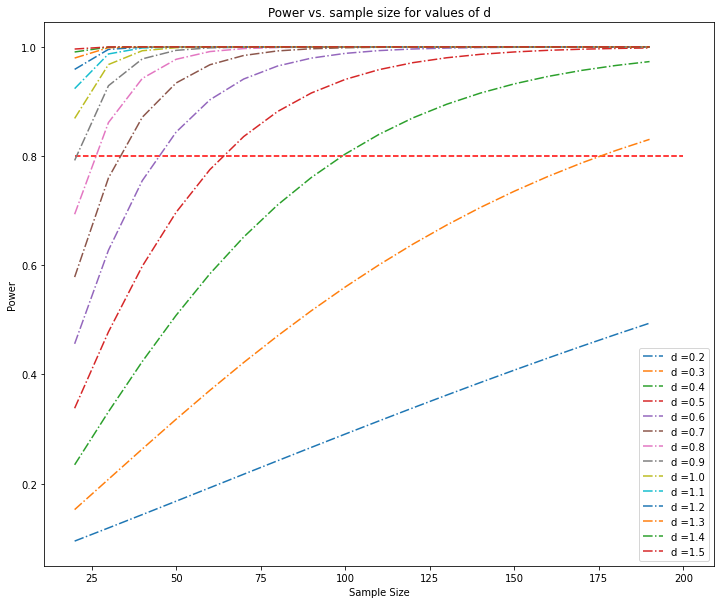

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(12,10)) # define plot area
ax = fig.gca() # define axis
powers.plot(x = 'sample_size', ax = ax, linestyle = '-.')
plt.hlines(y = 0.8, xmin = 20, xmax = 200, color = 'red', linestyle = '--')
plt.title('Power vs. sample size for values of d')
plt.ylabel('Power')
plt.xlabel('Sample Size')

In [23]:
'''You can modify the above code for different 
sample sizes and ranges, but the rest stays the same. You can easily see with the graph that 80% power (red 
dashed line) would take 180 participants per group for a d = .03 but would only take 45 people per group at d = .06.

One Final Word of Caution
Some people have brushed aside the issue of poor power, especially when a result is 
significant. After all, if a result is significant, it had power to reject the null, right?

Wrong. Beware significant findings from under-powered studies.

Consider a study that has very low power. In such a case, the researcher has almost no ability to find true effects.

However, false positives still happen 5% of the time (when the null is true).

Thus, as power gets lower, the number of "true" positives (real effects, discovered) goes down, while the number of 
false positives stays 
fixed. When power is low, false positives can equal or even outnumber true positives. In such cases, when an 
effect is significant, it is very challenging to know whether the effect is a true positive or a false positive. 
We will explore this issue in a future lesson, but take this as a word of caution about under-powered studies.
'''

'You can modify the above code for different \nsample sizes and ranges, but the rest stays the same. You can easily see with the graph that 80% power (red \ndashed line) would take 180 participants per group for a d = .03 but would only take 45 people per group at d = .06.\n\nOne Final Word of Caution\nSome people have brushed aside the issue of poor power, especially when a result is \nsignificant. After all, if a result is significant, it had power to reject the null, right?\n\nWrong. Beware significant findings from under-powered studies.\n\nConsider a study that has very low power. In such a case, the researcher has almost no ability to find true effects.\n\nHowever, false positives still happen 5% of the time (when the null is true).\n\nThus, as power gets lower, the number of "true" positives (real effects, discovered) goes down, while the number of \nfalse positives stays \nfixed. When power is low, false positives can equal or even outnumber true positives. In such cases, when 